# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
# display all columns of the dataframe
pd.options.display.max_columns = None
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier,BaggingClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

# Load Dataset - after part 2

In [2]:
df=pd.read_csv(r'C:\Users\SACHIN\Desktop\CAPSTONE PROJECT\Official Capstone diabetes Project\Data set CSV\dataset_diabetes UCI\Diabetes_preprocessing_2.csv')
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted,service_utilization,Asian,Caucasian,Hispanic,Other
0,0,15,0,0,0,3,59,0,18,8,0,8,9,0,0,0,0,0,1,1,1,0,0,0,1,0,0
1,0,25,0,0,0,2,11,5,13,8,0,8,6,0,0,0,0,0,0,0,1,0,3,0,0,0,0
2,1,35,0,0,0,2,44,1,16,8,0,1,7,0,0,0,0,0,1,1,1,0,0,0,1,0,0
3,1,45,0,0,0,1,51,0,8,7,7,0,5,0,0,0,0,0,0,1,1,0,0,0,1,0,0
4,1,55,0,0,1,3,31,6,16,1,1,0,9,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [3]:
df.shape

(97805, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97805 entries, 0 to 97804
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    97805 non-null  int64
 1   age                       97805 non-null  int64
 2   admission_type_id         97805 non-null  int64
 3   discharge_disposition_id  97805 non-null  int64
 4   admission_source_id       97805 non-null  int64
 5   time_in_hospital          97805 non-null  int64
 6   num_lab_procedures        97805 non-null  int64
 7   num_procedures            97805 non-null  int64
 8   num_medications           97805 non-null  int64
 9   diag_1                    97805 non-null  int64
 10  diag_2                    97805 non-null  int64
 11  diag_3                    97805 non-null  int64
 12  number_diagnoses          97805 non-null  int64
 13  max_glu_serum             97805 non-null  int64
 14  A1Cresult                 97805 non-nu

# Split the data

In [6]:
df['readmitted'].value_counts()

0    86599
1    11206
Name: readmitted, dtype: int64

In [7]:
# 0 : >30
# 1 : <30

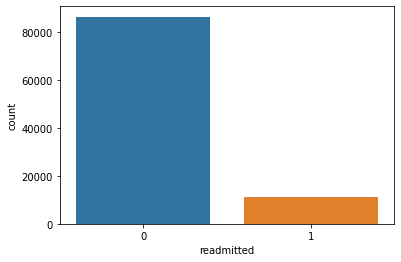

In [11]:
sns.countplot(df['readmitted']) #imbalanced data
plt.show()

In [5]:
X = df.drop('readmitted',axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(68463, 26) (29342, 26) (68463,) (29342,)


# 1.Logistic Regression

## a.With imbalance target

In [6]:
lr = LogisticRegression()  #without scaling
lr.fit(X_train,y_train)
print('Training Accuracy: ')
print(lr.score(X_train,y_train))
print('Testing Accuracy: ')
print(lr.score(X_test,y_test))

Training Accuracy: 
0.8854271650380497
Testing Accuracy: 
0.882864153772749


In [7]:
pt = PowerTransformer() #with scaling
powertrain = pt.fit_transform(X_train)
powertest = pt.transform(X_test)
lr = LogisticRegression()
lr.fit(powertrain,y_train)
print('Training Accuracy:')
print(lr.score(powertrain,y_train))
print('Testing Accuracy:')
print(lr.score(powertest,y_test))
y_testpred=lr.predict(powertest)
print('confusion matrix test set: \n',confusion_matrix(y_test,y_testpred))
y_trainpred=lr.predict(powertrain)
print('confusion matrix train set: \n',confusion_matrix(y_train,y_trainpred))
scores=cross_val_score(estimator=lr,X=powertrain,y=y_train,scoring='accuracy',cv=5)
print('Cross validation score: ',np.mean(scores))
print('precision',precision_score(y_test,y_testpred))
print('recall',recall_score(y_test,y_testpred))
print('f1_score',f1_score(y_test,y_testpred))
print('roc_auc_score test set: ',roc_auc_score(y_test,y_testpred))
print('precision',precision_score(y_train,y_trainpred))
print('recall',recall_score(y_train,y_trainpred))
print('f1_score',f1_score(y_train,y_trainpred))
print('roc_auc_score train set: ',roc_auc_score(y_train,y_trainpred))

Training Accuracy:
0.8860698479470663
Testing Accuracy:
0.8839206598050576
confusion matrix test set: 
 [[25936     0]
 [ 3406     0]]
confusion matrix train set: 
 [[60663     0]
 [ 7800     0]]
Cross validation score:  0.8860698478012237
precision 0.0
recall 0.0
f1_score 0.0
roc_auc_score test set:  0.5
precision 0.0
recall 0.0
f1_score 0.0
roc_auc_score train set:  0.5


## Create a generalized function to calculate the metrics for the train and the test set.

In [8]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    train_pred = model.predict(powertrain)
    return(classification_report(y_train, train_pred))

In [9]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    test_pred = model.predict(powertest)
    return(classification_report(y_test, test_pred))

In [10]:
train_report = get_train_report(lr)
test_report = get_test_report(lr)
print('Train data:\n',train_report)
print('Test data:\n',test_report)

Train data:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     60663
           1       0.00      0.00      0.00      7800

    accuracy                           0.89     68463
   macro avg       0.44      0.50      0.47     68463
weighted avg       0.79      0.89      0.83     68463

Test data:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     25936
           1       0.00      0.00      0.00      3406

    accuracy                           0.88     29342
   macro avg       0.44      0.50      0.47     29342
weighted avg       0.78      0.88      0.83     29342



## b.With balanced target (class weight)

In [11]:
pt = PowerTransformer()
powertrain = pt.fit_transform(X_train)
powertest = pt.transform(X_test)
logit = LogisticRegression(class_weight='balanced')
logit.fit(powertrain,y_train)
print('Training Accuracy:')
print(logit.score(powertrain,y_train))
print('Testing Accuracy:')
print(logit.score(powertest,y_test))
y_testpred=logit.predict(powertest)
print('confusion matrix test set: \n',confusion_matrix(y_test,y_testpred))
y_trainpred=logit.predict(powertrain)
print('confusion matrix train set: \n',confusion_matrix(y_train,y_trainpred))
scores=cross_val_score(estimator=logit,X=powertrain,y=y_train,scoring='accuracy',cv=5)
print('Cross validation score: ',np.mean(scores))
print('precision',precision_score(y_test,y_testpred))
print('recall',recall_score(y_test,y_testpred))
print('f1_score',f1_score(y_test,y_testpred))
print('roc_auc_score test set: ',roc_auc_score(y_test,y_testpred))
print('precision',precision_score(y_train,y_trainpred))
print('recall',recall_score(y_train,y_trainpred))
print('f1_score',f1_score(y_train,y_trainpred))
print('roc_auc_score train set: ',roc_auc_score(y_train,y_trainpred))

Training Accuracy:
0.5946715744270628
Testing Accuracy:
0.5898370935859859
confusion matrix test set: 
 [[15217 10719]
 [ 1316  2090]]
confusion matrix train set: 
 [[35949 24714]
 [ 3036  4764]]
Cross validation score:  0.594029017515448
precision 0.16316652353813724
recall 0.6136230182031709
f1_score 0.2577860006167129
roc_auc_score test set:  0.6001682333458791
precision 0.16161204966415632
recall 0.6107692307692307
f1_score 0.255593111218413
roc_auc_score train set:  0.6016854907122451


In [12]:
train_report = get_train_report(logit)
test_report = get_test_report(logit)
print('Train data:\n',train_report)
print('Test data:\n',test_report)

Train data:
               precision    recall  f1-score   support

           0       0.92      0.59      0.72     60663
           1       0.16      0.61      0.26      7800

    accuracy                           0.59     68463
   macro avg       0.54      0.60      0.49     68463
weighted avg       0.84      0.59      0.67     68463

Test data:
               precision    recall  f1-score   support

           0       0.92      0.59      0.72     25936
           1       0.16      0.61      0.26      3406

    accuracy                           0.59     29342
   macro avg       0.54      0.60      0.49     29342
weighted avg       0.83      0.59      0.66     29342



# 2. Decision Tree Classifier